<a href="https://colab.research.google.com/github/pd8459/MINIST/blob/main/MINIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim

In [ ]:
device= torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
import torchvision.datasets as datasets

data_root = './data'

train_set0 = datasets.MNIST(
    root = data_root,
    train = True,
    download = True)


In [ ]:
len(train_set0)

60000

In [ ]:
image, label = train_set0[0]

In [ ]:
type(image)

PIL.Image.Image

In [ ]:
type(label)

int

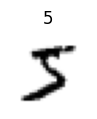

In [ ]:
plt.figure(figsize=(1,1))
plt.title(f'{label}')
plt.imshow(image)
plt.imshow(image,cmap='gray_r')
plt.axis('off')
plt.show()

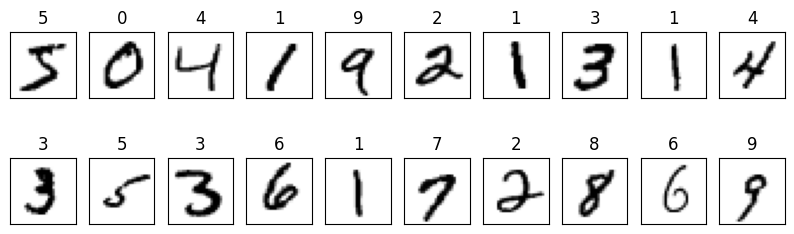

In [ ]:
plt.figure(figsize=(10,3))
for i in range(20):
  ax = plt.subplot(2,10,i+1)
  image, label = train_set0[i]
  plt.imshow(image, cmap='gray_r')
  plt.title(f'{label}')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import torchvision.transforms as transforms

transform1 = transforms.Compose([
    transforms.ToTensor(),
])

train_set1 = datasets.MNIST(
    root = data_root,
    train = True,
    download=True,
    transform = transform1)

In [ ]:
image, label = train_set1[0]
print('입력 데이터 타입 : ', type(image))
print('입력 데이터 shape : ', image.shape)
print('최솟값 : ', image.data.min())
print('최댓값 : ', image.data.max())

입력 데이터 타입 :  <class 'torch.Tensor'>
입력 데이터 shape :  torch.Size([1, 28, 28])
최솟값 :  tensor(0.)
최댓값 :  tensor(1.)


In [ ]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
transform2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.Lambda(lambda x: x.view(-1)),
])

train_set2 = datasets.MNIST(
    root = data_root, train = True,
    download=True, transform=transform2
)

In [ ]:
image, label= train_set2[0]
print('shape :', image.shape)
print('최솟값 :', image.data.min())
print('최댓값 :', image.data.max())

shape : torch.Size([784])
최솟값 : tensor(-1.)
최댓값 : tensor(1.)


In [ ]:
train_set = datasets.MNIST(
    root = data_root, train = True,
    download=True, transform=transform2)

test_set = datasets.MNIST(
    root = data_root, train = False,
    download=True, transform=transform2)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 512

train_loader = DataLoader(
    train_set, batch_size = batch_size,
    shuffle = True)

test_loader = DataLoader(
    test_set, batch_size = batch_size,
    shuffle = False)

In [ ]:
print(len(train_loader))

for images, labels in train_loader:
  break

print(images.shape)
print(labels.shape)

118
torch.Size([512, 784])
torch.Size([512])


In [ ]:
n_input = image.shape[0]

n_output = len(labels.unique())

n_hidden = 128

In [ ]:
n_input

784

In [ ]:
class Net(nn.Module):
  def __init__(self, n_input, n_output, n_hidden):
    super().__init__()

    self.l1 = nn.Linear(n_input, n_hidden)

    self.l2 = nn.Linear(n_hidden, n_output)

    self.relu = nn.ReLU()

  def forward(self, x):
    x1 = self.l1(x)
    x2 = self.relu(x1)
    x3 = self.l2(x2)
    return x3

In [ ]:
net = Net(n_input, n_output, n_hidden)

net = net.to(device)

In [ ]:
for parameter in net.named_parameters():
  print(parameter)

('l1.weight', Parameter containing:
tensor([[ 0.0196, -0.0293,  0.0316,  ...,  0.0328,  0.0267,  0.0135],
        [-0.0141,  0.0100,  0.0052,  ...,  0.0041, -0.0354,  0.0092],
        [ 0.0256, -0.0264, -0.0317,  ..., -0.0071,  0.0080, -0.0147],
        ...,
        [-0.0023, -0.0154,  0.0198,  ..., -0.0356,  0.0183, -0.0319],
        [-0.0046, -0.0188,  0.0348,  ...,  0.0262,  0.0135, -0.0273],
        [ 0.0343, -0.0056, -0.0183,  ..., -0.0014, -0.0193,  0.0350]],
       device='cuda:0', requires_grad=True))
('l1.bias', Parameter containing:
tensor([ 3.3446e-02,  1.3888e-02,  9.6773e-03, -2.3781e-02,  2.9973e-02,
         1.3647e-02,  2.0198e-02,  1.0468e-02,  1.3895e-02, -3.3578e-02,
         9.1410e-03, -1.6785e-02,  1.5696e-02, -1.8054e-02, -2.1021e-02,
        -1.8959e-02, -1.6844e-02,  3.4642e-02, -1.0850e-02, -3.1732e-02,
        -2.5592e-02, -1.1134e-02, -1.2835e-02, -2.6990e-02,  2.0784e-02,
        -5.8974e-03,  3.2154e-02, -8.1425e-03, -2.6081e-02, -3.2737e-02,
        -5.27

In [ ]:
print(net)

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


In [ ]:
!pip install torchinfo | tail -n 1
from torchinfo import summary

In [ ]:
summary(net,input_size=(512,784))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [512, 10]                 --
├─Linear: 1-1                            [512, 128]                100,480
├─ReLU: 1-2                              [512, 128]                --
├─Linear: 1-3                            [512, 10]                 1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 52.11
Input size (MB): 1.61
Forward/backward pass size (MB): 0.57
Params size (MB): 0.41
Estimated Total Size (MB): 2.58

In [ ]:
torch.cuda.manual_seed(123)

lr = 0.01

optimizer = torch.optim.Adam(net.parameters(), lr=lr)

criterion = nn.CrossEntropyLoss()

history = np.zeros((0,5))

In [ ]:
from tqdm.notebook import tqdm
num_epochs = 20
for epoch in range(num_epochs):
  train_acc, train_loss = 0,0
  test_acc, test_loss = 0,0
  n_train, n_test = 0,0
  for inputs, labels in tqdm(train_loader):
      n_train += len(labels)

      inputs =  inputs.to(device)
      labels = labels.to(device)
      optimizer.zero_grad()
      outputs = net(inputs)
      loss = criterion(outputs,  labels)
      loss.backward()
      optimizer.step()
      predicted = outputs.max(axis=1)[1]

      train_loss += loss.item()
      train_acc += (predicted == labels).sum().item()

      print(f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} test_loss: {test_loss:.5f} test_acc: {test_acc:.5f}')

  for inputs_test, labels_test in test_loader:
      n_test += len(labels_test)

      inputs_test = inputs_test.to(device)
      labels_test = labels_test.to(device)

      outputs_test = net(inputs_test)

      loss_test = criterion(outputs_test, labels_test)

      predicted_test = outputs_test.max(axis=1)[1]

      test_loss += loss_test.item()
      test_acc += (predicted_test == labels_test).sum().item()

  train_acc = train_acc / n_train
  test_acc = test_acc / n_test
  train_loss = train_loss /n_train
  test_loss = test_loss / n_test
  item = np.array([epoch+1, train_loss, train_acc, test_loss, test_acc])
  history = np.vstack((history, item))



  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

Epoch [20/20], loss: 0.00018 acc: 0.97135 test_loss: 0.00033 test_acc: 0.95710


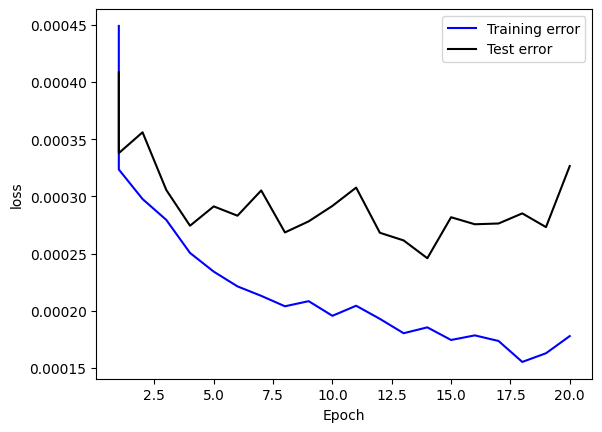

In [ ]:
plt.plot(history[:,0], history[:,1], 'b', label='Training error')
plt.plot(history[:,0], history[:,3], 'k', label='Test error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

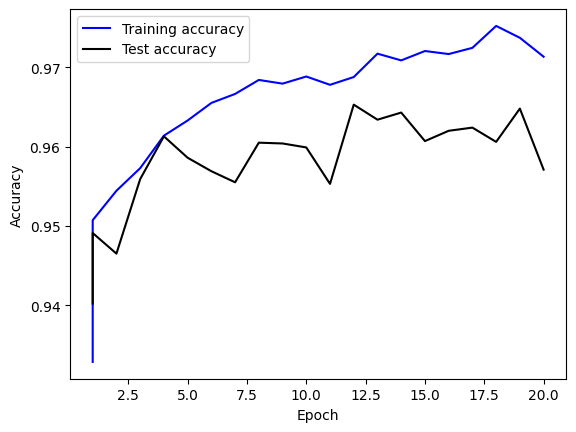

In [ ]:
plt.plot(history[:,0], history[:,2], 'b', label='Training accuracy')
plt.plot(history[:,0], history[:,4], 'k', label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
for images, labels in test_loader:
  break
inputs = images.to(device)
labels = labels.to(device)
outputs = net(inputs)
predicted = torch.max(outputs, 1)[1]


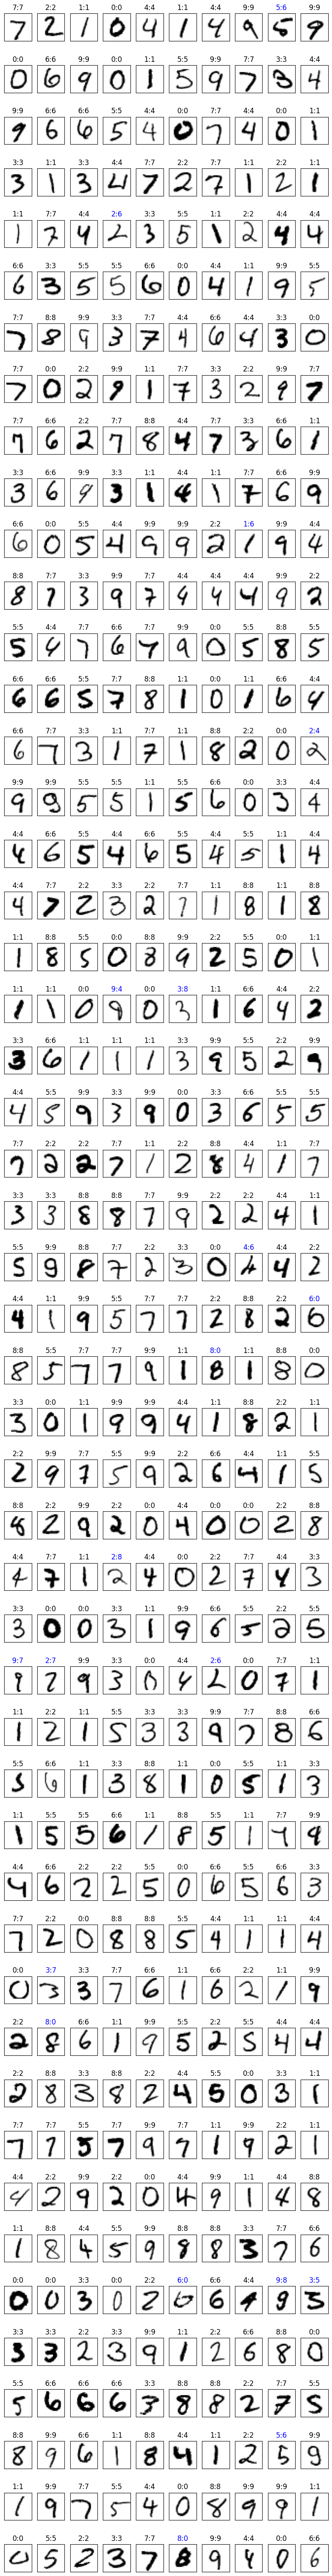

In [ ]:
plt.figure(figsize=(10,80))
for i in range(500):
  ax = plt.subplot(50,10,i+1)

  image = images[i]
  label = labels[i]
  pred = predicted[i]
  if(pred == label):
    c = 'k'
  else:
    c = 'b'

  image2 = (image + 1)/2

  plt.imshow(image2.reshape(28,28),cmap = 'gray_r')
  ax.set_title(f'{label}:{pred}', c=c)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
num_epochs = 30
batch_iter = [2**6,2**7, 2**8, 2**9,2**10]
for num, b_size in enumerate(batch_iter):

  train_loader = DataLoader(
      train_set, batch_size = b_size,
      shuffle = True)
  torch.cuda.manual_seed(123)
  net = Net(n_input, n_output, n_hidden).to(device)
  optimizer = optim.Adam(net.parameters(), lr=lr)
  criterion = nn.CrossEntropyLoss()

  globals()['history{}'.format(num)] = np.zeros((0,5))